# **Lab Assignment Three: Extending Logistic Regression**  
***Logan Choi***  

## **1. Preparation and Overview**  
The goal of this project is to develop a **multi-class classification model** to predict **student performance** based on demographic and academic factors. The **Student Performance Dataset** contains various attributes related to students' backgrounds, study habits, and school-related factors, along with their final grades. Since predicting an exact grade is challenging, we simplify this into a three-class classification problem:  

* **Low Performance (0-9)**
* **Medium Performance (10-14)**
* **High Performance (15-20)**  

### **Business & Use-Case**  
This model can be useful for:  

1. **Educational Institutions & Teachers**  
   * Helps identify at-risk students early.  
   * Assists in providing targeted academic interventions.  
   * Improves curriculum planning and resource allocation.  

2. **Students & Parents**  
   * Helps students understand key factors influencing their academic success.  
   * Provides insights into study habits and attendance impact.  

3. **Policymakers & Educational Researchers**  
   * Supports data-driven decision-making in education policy.  
   * Helps analyze the impact of socio-economic factors on academic performance.  

### **Performance Expectations**  
* **Baseline Accuracy:** If student performance is randomly guessed, accuracy would be around **33%** (since there are three classes).  
* **Useful Performance:** Achieving **70%+ accuracy** would indicate a meaningful model for academic insights and interventions.  

---  

**Dataset:** Student Performance Dataset  

**URL:** [https://archive.ics.uci.edu/ml/datasets/Student+Performance](https://archive.ics.uci.edu/ml/datasets/Student+Performance)  


In [1509]:
import pandas as pd
import numpy as np
import warnings

In [1510]:
warnings.filterwarnings("ignore")

In [1511]:
# Read in dataset
student_mat = pd.read_csv('/Users/loganchoi/Desktop/logistic-regression/data/student/student-mat.csv', sep=';')
student_por = pd.read_csv('/Users/loganchoi/Desktop/logistic-regression/data/student/student-por.csv', sep=';')

In [1512]:
# Shape of data
print(student_mat.shape)
print(student_por.shape)

(395, 33)
(649, 33)


In [1513]:
# Combine both datasets
df = pd.concat([student_mat, student_por], ignore_index=True)

In [1514]:
# Number of rows and columns
df.shape

(1044, 33)

In [1515]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Combine both dataests

6497 rows

In [1516]:
# Check for missing values
print(df.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


No missing values

In [1517]:
# Check for missing rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


No duplicated rows

In [1518]:
# Describe summary
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


Data summary

In [1519]:
# Initialize an empty DataFrame
data_des = pd.DataFrame()

# Add feature names
data_des['Features'] = [
    "school", "sex", "age", "address", "famsize", "Pstatus", "Medu", "Fedu", "Mjob", "Fjob", "reason", 
    "guardian", "traveltime", "studytime", "failures", "schoolsup", "famsup", "paid", "activities", 
    "nursery", "higher", "internet", "romantic", "famrel", "freetime", "goout", "Dalc", "Walc", "health", 
    "absences", "G1", "G2", "G3"
]

# Add descriptions for each feature
data_des['Description'] = [
    "Student's school (e.g., 'GP' or 'MS')",
    "Student's sex (Male/Female)",
    "Student's age (in years)",
    "Student's address (Urban/Rural)",
    "Student's family size (Small/Large)",
    "Parental cohabitation status (T = Together, A = Apart)",
    "Mother's education level (0 - 4)",
    "Father's education level (0 - 4)",
    "Mother's job (e.g., 'teacher', 'health', etc.)",
    "Father's job (e.g., 'teacher', 'health', etc.)",
    "Reason to choose the school (e.g., 'course', 'home', etc.)",
    "Student's guardian (e.g., 'mother', 'father', 'other')",
    "Time travel to school (1 = <15 min, 4 = >60 min)",
    "Weekly study time (1 - 4)",
    "Number of past failures (0 - 3)",
    "Extra educational support (Yes/No)",
    "Family educational support (Yes/No)",
    "Extra paid classes (Yes/No)",
    "Student's extracurricular activities (Yes/No)",
    "Attended nursery school (Yes/No)",
    "Student's desire for higher education (Yes/No)",
    "Access to the internet (Yes/No)",
    "Romantic relationship (Yes/No)",
    "Family relationship quality (1-5)",
    "Leisure time (1-5)",
    "Socializing (1-5)",
    "Workday alcohol consumption (1-5)",
    "Weekend alcohol consumption (1-5)",
    "Health status (1-5)",
    "Absences (number of school absences)",
    "First period grade (G1)",
    "Second period grade (G2)",
    "Final grade (G3 - target variable)"
]

# Add scales for each feature
data_des['Scales'] = [
    "Nominal",    # school
    "Nominal",    # sex
    "Ratio",      # age
    "Nominal",    # address
    "Nominal",    # famsize
    "Nominal",    # Pstatus
    "Ordinal",    # Medu
    "Ordinal",    # Fedu
    "Nominal",    # Mjob
    "Nominal",    # Fjob
    "Nominal",    # reason
    "Nominal",    # guardian
    "Ordinal",    # traveltime
    "Ordinal",    # studytime
    "Ordinal",    # failures
    "Nominal",    # schoolsup
    "Nominal",    # famsup
    "Nominal",    # paid
    "Nominal",    # activities
    "Nominal",    # nursery
    "Nominal",    # higher
    "Nominal",    # internet
    "Nominal",    # romantic
    "Ordinal",    # famrel
    "Ordinal",    # freetime
    "Ordinal",    # goout
    "Ordinal",    # Dalc
    "Ordinal",    # Walc
    "Ordinal",    # health
    "Ratio",      # absences
    "Ratio",      # G1
    "Ratio",      # G2
    "Ordinal",    # G3 (target variable)
]

# Add Discrete/Continuous classification
data_des['Type'] = [
    "Categorical",  # school
    "Categorical",  # sex
    "Continuous",   # age
    "Categorical",  # address
    "Categorical",  # famsize
    "Categorical",  # Pstatus
    "Discrete",     # Medu
    "Discrete",     # Fedu
    "Categorical",  # Mjob
    "Categorical",  # Fjob
    "Categorical",  # reason
    "Categorical",  # guardian
    "Discrete",     # traveltime
    "Discrete",     # studytime
    "Discrete",     # failures
    "Categorical",  # schoolsup
    "Categorical",  # famsup
    "Categorical",  # paid
    "Categorical",  # activities
    "Categorical",  # nursery
    "Categorical",  # higher
    "Categorical",  # internet
    "Categorical",  # romantic
    "Discrete",     # famrel
    "Discrete",     # freetime
    "Discrete",     # goout
    "Discrete",     # Dalc
    "Discrete",     # Walc
    "Discrete",     # health
    "Continuous",   # absences
    "Continuous",   # G1
    "Continuous",   # G2
    "Ordinal",      # G3
]

# Add range for each feature
data_des['Range'] = [
    "GP / MS",             # school
    "Male / Female",       # sex
    "15 - 22",             # age
    "Urban / Rural",       # address
    "Small / Large",       # famsize
    "T / A",               # Pstatus
    "0 - 4",               # Medu
    "0 - 4",               # Fedu
    "teacher / health / other",  # Mjob
    "teacher / health / other",  # Fjob
    "course / home / other",  # reason
    "mother / father / other",  # guardian
    "1 - 4",               # traveltime
    "1 - 4",               # studytime
    "0 - 3",               # failures
    "Yes / No",            # schoolsup
    "Yes / No",            # famsup
    "Yes / No",            # paid
    "Yes / No",            # activities
    "Yes / No",            # nursery
    "Yes / No",            # higher
    "Yes / No",            # internet
    "Yes / No",            # romantic
    "1 - 5",               # famrel
    "1 - 5",               # freetime
    "1 - 5",               # goout
    "1 - 5",               # Dalc
    "1 - 5",               # Walc
    "1 - 5",               # health
    "0 - 93",              # absences
    "0 - 20",              # G1
    "0 - 20",              # G2
    "0 - 20",              # G3 (target variable)
]

# Display the DataFrame
data_des


,Features,Description,Scales,Type,Range
0,school,"Student's school (e.g., 'GP' or 'MS')",Nominal,Categorical,GP / MS
1,sex,Student's sex (Male/Female),Nominal,Categorical,Male / Female
2,age,Student's age (in years),Ratio,Continuous,15 - 22
3,address,Student's address (Urban/Rural),Nominal,Categorical,Urban / Rural
4,famsize,Student's family size (Small/Large),Nominal,Categorical,Small / Large
5,Pstatus,"Parental cohabitation status (T = Together, A ...",Nominal,Categorical,T / A
6,Medu,Mother's education level (0 - 4),Ordinal,Discrete,0 - 4
7,Fedu,Father's education level (0 - 4),Ordinal,Discrete,0 - 4
8,Mjob,"Mother's job (e.g., 'teacher', 'health', etc.)",Nominal,Categorical,teacher / health / other
9,Fjob,"Father's job (e.g., 'teacher', 'health', etc.)",Nominal,Categorical,teacher / health / other


Description of data

Need to convert categorical data into numerical data using one-hot encoding

In [1520]:
# Visualizetion
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

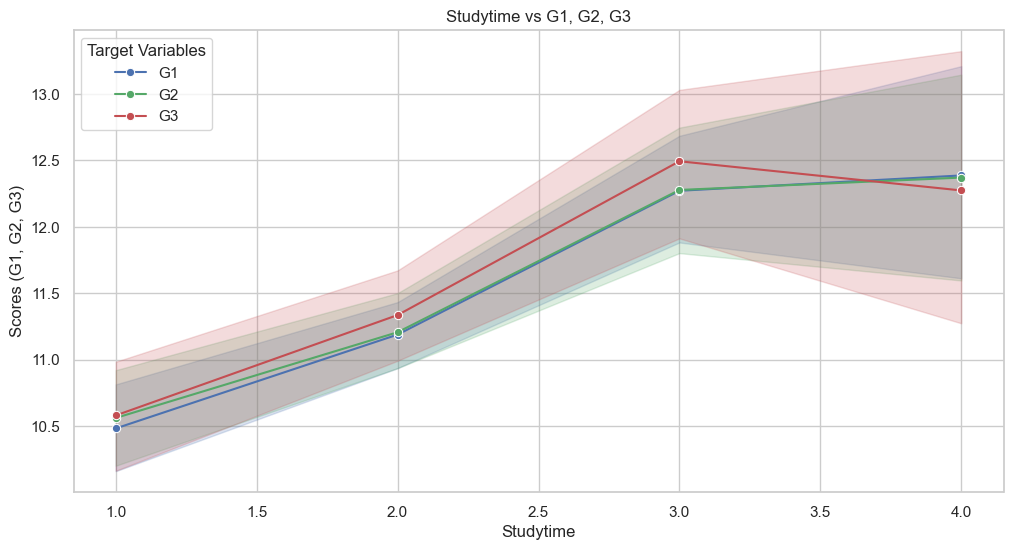

In [1521]:
# Set up the plot
plt.figure(figsize=(12, 6))

# Plot Studytime vs G1, G2, and G3 in the same graph
sns.lineplot(x='studytime', y='G1', data=df, marker='o', label='G1', color='b')
sns.lineplot(x='studytime', y='G2', data=df, marker='o', label='G2', color='g')
sns.lineplot(x='studytime', y='G3', data=df, marker='o', label='G3', color='r')

# Customize the plot
plt.title('Studytime vs G1, G2, G3')
plt.xlabel('Studytime')
plt.ylabel('Scores (G1, G2, G3)')
plt.grid(True)

# Add a legend
plt.legend(title='Target Variables')

# Show the plot
plt.show()

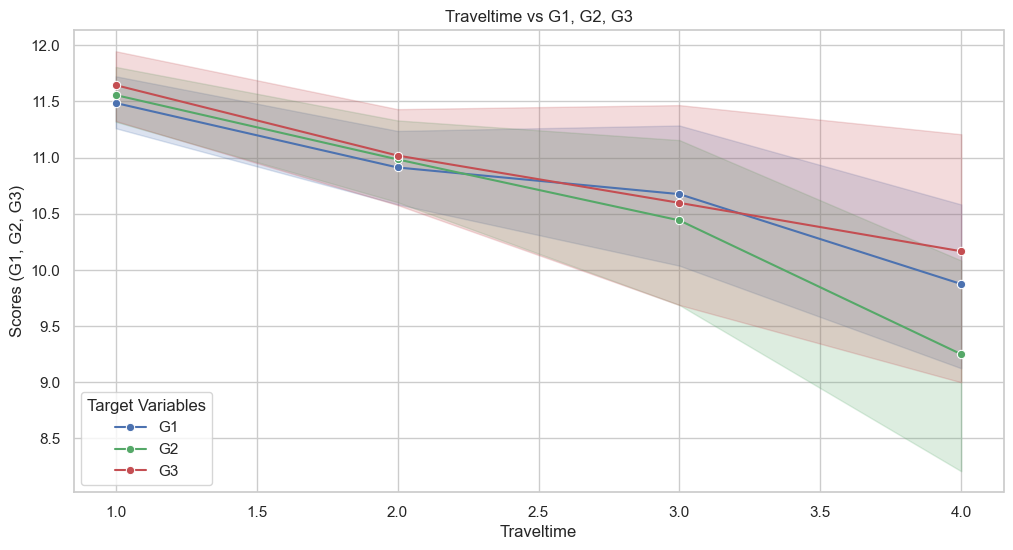

In [1522]:
# Set up the plot
plt.figure(figsize=(12, 6))

# Plot Traveltime vs G1, G2, and G3 in the same graph
sns.lineplot(x='traveltime', y='G1', data=df, marker='o', label='G1', color='b')
sns.lineplot(x='traveltime', y='G2', data=df, marker='o', label='G2', color='g')
sns.lineplot(x='traveltime', y='G3', data=df, marker='o', label='G3', color='r')

# Customize the plot
plt.title('Traveltime vs G1, G2, G3')
plt.xlabel('Traveltime')
plt.ylabel('Scores (G1, G2, G3)')
plt.grid(True)

# Add a legend
plt.legend(title='Target Variables')

# Show the plot
plt.show()


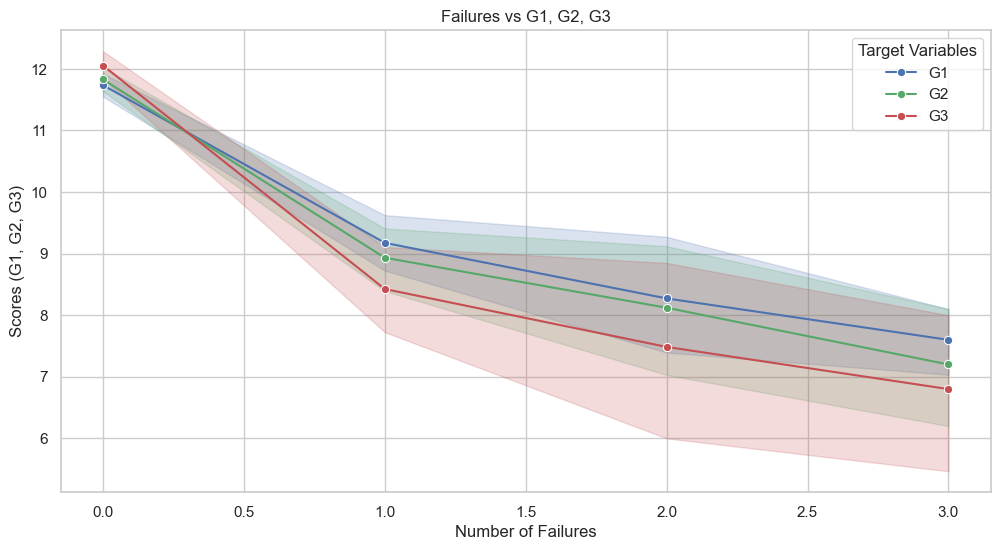

In [1523]:
# Set up the plot
plt.figure(figsize=(12, 6))

# Plot Failures vs G1, G2, G3 in the same graph
sns.lineplot(x='failures', y='G1', data=df, marker='o', label='G1', color='b')
sns.lineplot(x='failures', y='G2', data=df, marker='o', label='G2', color='g')
sns.lineplot(x='failures', y='G3', data=df, marker='o', label='G3', color='r')

# Customize the plot
plt.title('Failures vs G1, G2, G3')
plt.xlabel('Number of Failures')
plt.ylabel('Scores (G1, G2, G3)')
plt.grid(True)

# Add a legend
plt.legend(title='Target Variables')

# Show the plot
plt.show()

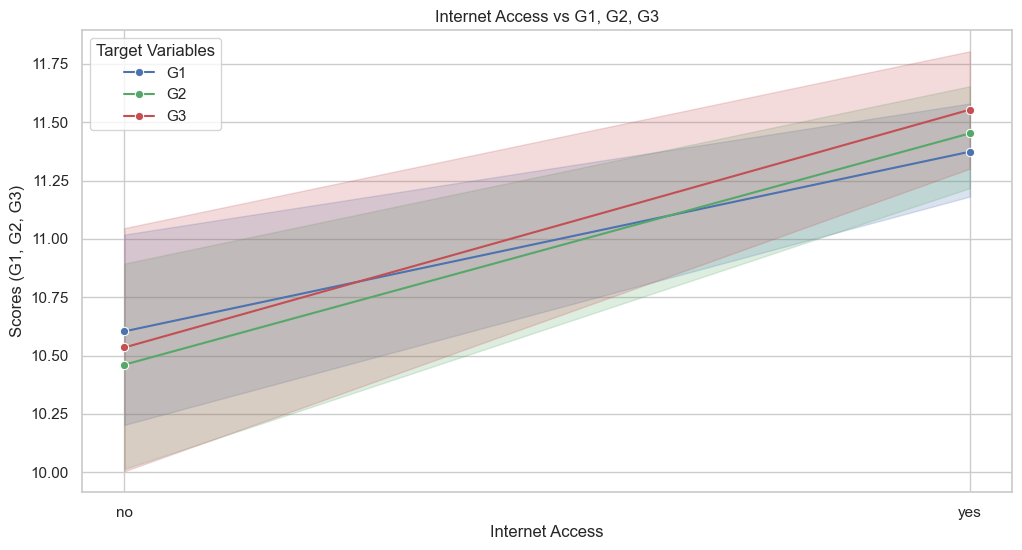

In [1524]:
# Set up the plot
plt.figure(figsize=(12, 6))

# Plot the correlation between internet access and G1, G2, and G3
sns.lineplot(x='internet', y='G1', data=df, marker='o', label='G1', color='b')
sns.lineplot(x='internet', y='G2', data=df, marker='o', label='G2', color='g')
sns.lineplot(x='internet', y='G3', data=df, marker='o', label='G3', color='r')

# Customize the plot
plt.title('Internet Access vs G1, G2, G3')
plt.xlabel('Internet Access')
plt.ylabel('Scores (G1, G2, G3)')
plt.grid(True)

# Add a legend
plt.legend(title='Target Variables')

# Show the plot
plt.show()


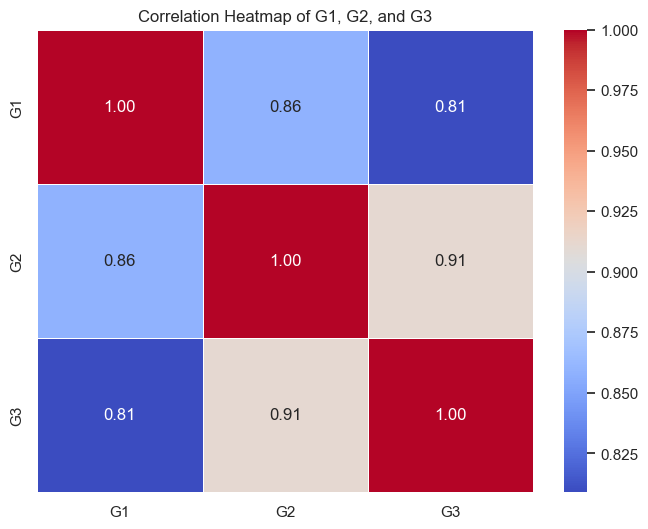

In [1525]:
# Calculate the correlation matrix for G1, G2, G3
corr_matrix = df[['G1', 'G2', 'G3']].corr()

# Set up the plot
plt.figure(figsize=(8, 6))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Customize the plot
plt.title('Correlation Heatmap of G1, G2, and G3')

# Show the plot
plt.show()

In [1526]:
# Create a new feature 'average_G' that is the average of G1, G2, and G3
df['average_G'] = df[['G1', 'G2', 'G3']].mean(axis=1)

# Show the first few rows of the updated dataframe to check the new feature
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,average_G
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,5.666667
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,5.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,8.333333
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,14.666667
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,8.666667


In [1527]:
# Split data
from sklearn.model_selection import train_test_split

In [1528]:
# Cross validation
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [1529]:
# Convert target to categories
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [1530]:
# Bin the 'average_G' target into three categories: Low, Medium, High
bins = [0, 10, 15, 20]  # Adjust the bin edges to match the range of 'average_G'
labels = ['Low', 'Medium', 'High']
y_binned = pd.cut(df['average_G'], bins=bins, labels=labels, right=False)

# Features (X) and target (y_binned)
X = df.drop(columns=["average_G"])
y = y_binned

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1531]:
# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Create a column transformer to preprocess the data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.select_dtypes(exclude=['object']).columns),  # Standardize numerical columns
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # One-hot encode categorical columns
    ])

# Create a pipeline with preprocessing and Logistic Regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing step
    ('classifier', LogisticRegression(max_iter=10000))  # Logistic regression classifier
])

# Perform 5-fold cross-validation to evaluate the model
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# Print results
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation of accuracy: {cv_scores.std():.4f}")

Cross-validation accuracy scores: [0.94610778 0.95808383 0.95808383 0.96407186 0.93413174]
Mean accuracy: 0.9521
Standard Deviation of accuracy: 0.0107


## Modeling

In [1532]:
from sklearn.metrics import accuracy_score, classification_report
from scipy.special import expit

In [1533]:
class BinaryLogisticRegressionBase:
    # private:
    def __init__(self, eta, iterations=20):
        self.eta = eta
        self.iters = iterations
        # internally we will store the weights as self.w_ to keep with sklearn conventions
    
    def __str__(self):
        return 'Base Binary Logistic Regression Object, Not Trainable'
    
    # convenience, private and static:
    @staticmethod
    def _sigmoid(theta):
        return 1/(1+np.exp(-theta)) 
    
    @staticmethod
    def _add_intercept(X):
        return np.hstack((np.ones((X.shape[0],1)),X)) # add bias term
    
    # public:
    def predict_proba(self, X, add_intercept=True):
        # add bias term if requested
        Xb = self._add_intercept(X) if add_intercept else X
        return self._sigmoid(Xb @ self.w_) # return the probability y=1
    
    def predict(self,X):
        return (self.predict_proba(X)>0.5) #return the actual prediction

In [1534]:
# inherit from base class
class BinaryLogisticRegression(BinaryLogisticRegressionBase):
    #private:
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'Binary Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained Binary Logistic Regression Object'


    @property
    def coef_(self):
        if(hasattr(self,'w_')):
            return self.w_[1:]
        else:
            return None

    @property
    def intercept_(self):
        if(hasattr(self,'w_')):
            return self.w_[0]
        else:
            return None

        
    def _get_gradient(self,X,y):
        # programming \sum_i (yi-g(xi))xi
        gradient = np.zeros(self.w_.shape) # set gradient to zero
        for (xi,yi) in zip(X,y):
            # the actual update inside of sum
            gradi = (yi - self.predict_proba(xi,add_intercept=False))*xi 
            # reshape to be column vector and add to gradient
            gradient += gradi.reshape(self.w_.shape) 
        
        return gradient/float(len(y))
       
    # public:
    def fit(self, X, y):
        Xb = self._add_intercept(X) # add bias term
        num_samples, num_features = Xb.shape
        
        self.w_ = np.zeros((num_features,1)) # init weight vector to zeros
        
        # for as many as the max iterations
        for _ in range(self.iters):
            gradient = self._get_gradient(Xb,y)
            self.w_ += gradient*self.eta # multiply by learning rate 


In [1535]:
class VectorBinaryLogisticRegression(BinaryLogisticRegression):
    # inherit from our previous class to get same functionality
    @staticmethod
    def _sigmoid(theta):
        # increase stability, redefine sigmoid operation
        return expit(theta) #1/(1+np.exp(-theta))
    
    # but overwrite the gradient calculation
    def _get_gradient(self,X,y):
        ydiff = y-self.predict_proba(X,add_intercept=False).ravel() # get y difference
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
        
        return gradient.reshape(self.w_.shape)

In [1536]:
class LogisticRegression:
    def __init__(self, eta, iterations=20):
        self.eta = eta
        self.iters = iterations
        # internally we will store the weights as self.w_ to keep with sklearn conventions
    
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'MultiClass Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained MultiClass Logistic Regression Object'

    @property
    def coef_(self):
        if(hasattr(self,'w_')):
            return self.w_[:,1:]
        else:
            return None

    @property
    def intercept_(self):
        if(hasattr(self,'w_')):
            return self.w_[:,0]
        else:
            return None
        
    def fit(self,X,y):
        num_samples, num_features = X.shape
        self.unique_ = np.unique(y) # get each unique class value
        num_unique_classes = len(self.unique_)
        self.classifiers_ = [] # will fill this array with binary classifiers
        
        for i,yval in enumerate(self.unique_): # for each unique value
            y_binary = (y==yval) # create a binary problem
            # train the binary classifier for this class
            blr = VectorBinaryLogisticRegression(self.eta,
                                                 self.iters)
            blr.fit(X,y_binary)
            # add the trained classifier to the list
            self.classifiers_.append(blr)
            
        # save all the weights into one matrix, separate column for each class
        self.w_ = np.hstack([x.w_ for x in self.classifiers_]).T
        
    def predict_proba(self,X):
        probs = []
        for blr in self.classifiers_:
            probs.append(blr.predict_proba(X)) # get probability for each classifier
        
        return np.hstack(probs) # make into single matrix
    
    def predict(self,X):
        return self.unique_[np.argmax(self.predict_proba(X),axis=1)] # take argmax along row

In [1540]:
categorical_cols = X_train.select_dtypes(include=['object']).columns

# One-hot encode categorical columns
X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

X_train_scaled = np.array(X_train_scaled)
y_train = np.array(y_train)

lr = LogisticRegression(eta=0.1, iterations=500)
lr.fit(X_train_scaled, y_train)

accuracy = np.mean(lr.predict(X_test_scaled) == y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.8469
